In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [50]:
data = pd.read_csv("train_and_test.csv")

In [51]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [52]:
data.shape

(1309, 28)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [54]:
data.rename(columns={"2urvived":"Survived"}, inplace=True)

In [55]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [56]:
X = data[["Pclass", "Age", "Fare", "Sex"]].values

In [57]:
X

array([[ 3.    , 22.    ,  7.25  ,  0.    ],
       [ 1.    , 38.    , 71.2833,  1.    ],
       [ 3.    , 26.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    , 38.5   ,  7.25  ,  0.    ],
       [ 3.    , 28.    ,  8.05  ,  0.    ],
       [ 3.    , 28.    , 22.3583,  0.    ]])

In [58]:
y = data["Survived"].values

In [59]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 4), (262, 4), (1047,), (262,))

In [62]:
import shap

In [63]:
# Treain Model

model = HistGradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [64]:
# SHAP Values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

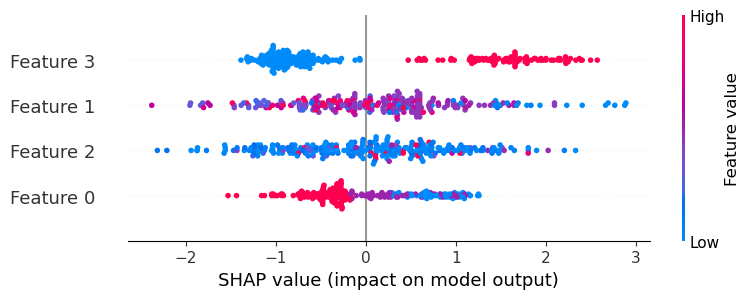

In [65]:
# Plot SHAP Values

shap.summary_plot(shap_values, X_test)

In [66]:
model.score(X_test, y_test)

0.7366412213740458

### Composants du graphique :

- Axe des ordonnées (vertical) : Représente les différentes caractéristiques (features) utilisées par le modèle. Dans ce cas, il y a 4 caractéristiques : Feature 2, Feature 1, Feature 0, Feature 3.
- Axe des abscisses (horizontal) : Représente les valeurs SHAP. Ces valeurs indiquent l'impact de chaque caractéristique sur la sortie du modèle.
     * Les valeurs SHAP positives (à droite de 0) indiquent que la caractéristique a contribué à augmenter la sortie du modèle.

     * Les valeurs SHAP négatives (à gauche de 0) indiquent que la caractéristique a contribué à diminuer la sortie du modèle.

     * Plus la valeur absolue de la valeur SHAP est grande, plus l'impact de la caractéristique sur la sortie du modèle est important.
 

- Points colorés : Chaque point représente une instance (un échantillon de données). La couleur du point indique la valeur de la caractéristique pour cette instance, selon la légende de la couleur:
    * Les points bleus représentent des valeurs faibles de la caractéristique.
    * Les points rouges représentent des valeurs élevées de la caractéristique.

### Interprétation des caractéristiques individuelles

- Feature 3 : Les valeurs de faible feature (bleu) tendent à avoir une valeur SHAP négative, ce qui signifie qu'elles diminuent le résultat prédit par le modèle. Les valeurs de feature élevées (rouge) ont tendance à avoir une valeur SHAP positive, ce qui signifie qu'elles augmentent le résultat prédit par le modèle.

- Feature 1 : Cette feature semble avoir un impact plus complexe. Il y a une dispersion des points à la fois pour les valeurs faibles et élevées des features, ce qui indique que l'impact de cette feature sur la prédiction du modèle est plus complexe et peut dépendre d'autres features.

- Feature 2 : De la même manière que pour la feature 3, il y a une certaine distinction entre les valeurs élevées (rouge) et faibles (bleu). Les valeurs élevées de la feature ont tendance à déplacer la prédiction vers la droite (augmentation du résultat), tandis que les valeurs faibles déplacent la prédiction vers la gauche (diminution du résultat).

- Feature 0 : Les valeurs de feature élevées (rouge) ont tendance à avoir des valeurs SHAP négatives, ce qui signifie qu'elles diminuent le résultat prédit par le modèle. Les valeurs de feature faibles (bleu) ont tendance à avoir des valeurs SHAP positives, ce qui signifie qu'elles augmentent le résultat prédit par le modèle.

### Principales conclusions

- L'importance relative des caractéristiques peut être déduite de la plage des valeurs SHAP. Plus la plage est étendue, plus la feature a le potentiel d'affecter la sortie du modèle.

- Cette visualisation permet de comprendre non seulement quelles features sont importantes, mais aussi comment leurs valeurs affectent les prédictions du modèle. Cela permet d'identifier des relations non linéaires ou complexes entre les features et la variable cible.

### En résumé : 
- Ce graphique fournit une vue d'ensemble de la façon dont chaque feature influence la sortie du modèle, tenant compte à la fois de la valeur de la feature et de son impact sur la prédiction.